# IMPORT LIBRARY

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

%matplotlib inline

# MEMBACA GAMBAR

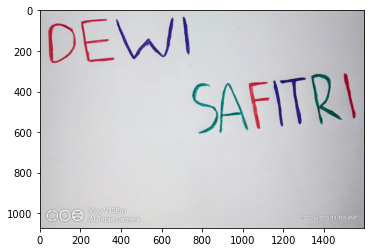

In [3]:
color_image = img.imread('UTSPRAKB.jpg')
plt.imshow(color_image)

# DETEKSI WARNA PADA CITRA

In [4]:
rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

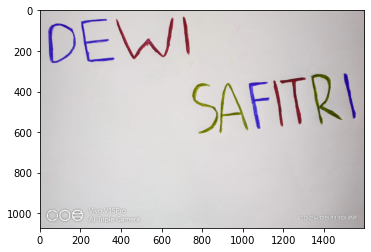

In [5]:
plt.imshow(rgb)

# CITRA KONTRAS

In [6]:
(baris, kolom)= rgb.shape[:2]

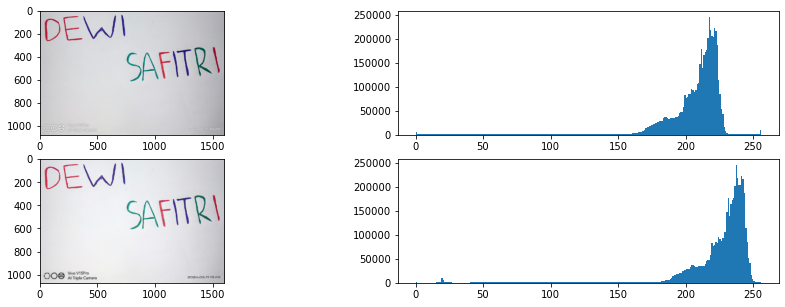

In [7]:
beta = 20
citra_cerah = np.zeros((baris, kolom, 3))

for x in range(baris) :
    for y in range(kolom) :
        gyx = color_image[x,y] + beta
        citra_cerah[x,y] = gyx
citra_cerah = citra_cerah.astype(np.uint8)

fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(color_image)
axs[0,1].hist(color_image.ravel(),256,[0,256])
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(),256,[0,256])
plt.show()

# DETEKSI WARNA BIRU,MERAH, DAN HIJAU

(-0.5, 1599.5, 1071.5, -0.5)

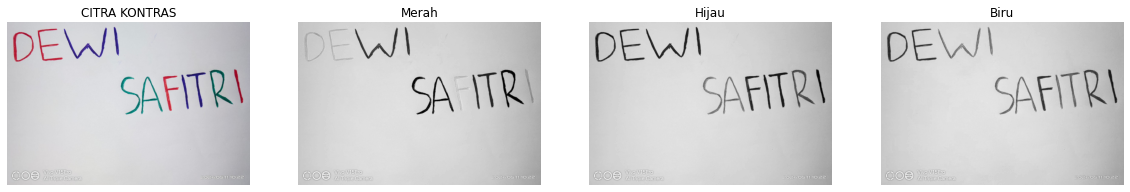

In [8]:
r = color_image[:, :, 0] 
g = color_image[:, :, 1] 
b = color_image[:, :, 2]

f, (c1, c2, c3, c4) = plt.subplots(1, 4, figsize = (20,10))

c1.set_title('CITRA KONTRAS')
c1.imshow(color_image) 
c1.axis('off')

c2.set_title('Merah') 
c2.imshow(r, cmap="gray") 
c2.axis('off')

c3.set_title('Hijau') 
c3.imshow(g, cmap="gray") 
c3.axis('off')

c4.set_title('Biru') 
c4.imshow(b, cmap="gray")
c4.axis('off')

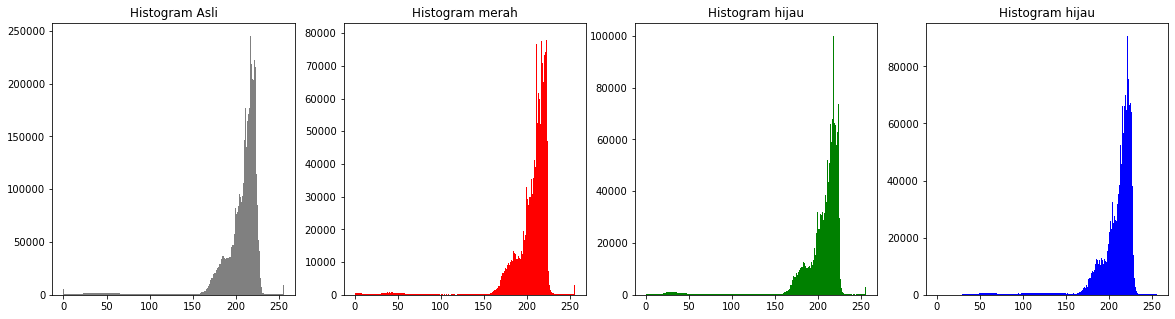

In [9]:
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.title('Histogram Asli')
plt.hist(color_image.flatten(), bins=256, range=[0,256], color='gray')

plt.subplot(142)
plt.title('Histogram merah')
plt.hist(r.flatten(), bins=256, range=[0,256], color='r')

plt.subplot(143)
plt.title('Histogram hijau')
plt.hist(g.flatten(), bins=256, range=[0,256], color='g')

plt.subplot(144)
plt.title('Histogram hijau')
plt.hist(b.flatten(), bins=256, range=[0,256], color='b')

plt.show()

# AMBANG BATAS CITRA BLUE

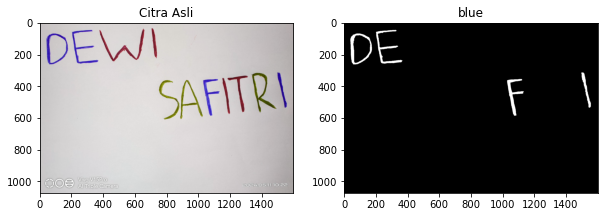

In [12]:
hsv = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# Tentukan batas atas dan batas bawah untuk warna biru dalam ruang warna HSV
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Buat mask untuk warna biru
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Terapkan mask pada citra asli
hasil = cv2.bitwise_and(color_image, color_image, mask=mask)

# Tampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title('blue')

plt.show()

# AMBANG BATAS RED-BLUE

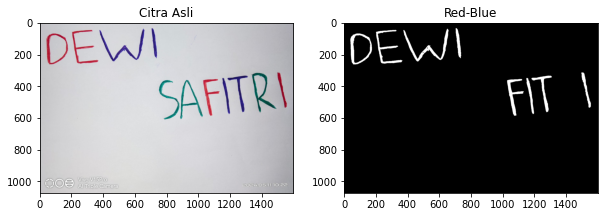

In [15]:
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Tentukan batas atas dan batas bawah untuk warna merah dalam ruang warna HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Buat mask untuk warna biru dan merah
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Gabungkan mask biru dan mask merah
mask_combined = cv2.bitwise_or(mask_blue, mask_red1)
mask_combined = cv2.bitwise_or(mask_combined, mask_red2)

# Terapkan mask pada citra asli
hasil = cv2.bitwise_and(color_image, color_image, mask=mask_combined)

# Tampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(color_image)
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_combined, cmap='gray')
axs[1].set_title('Red-Blue')

plt.show()

# AMBANG BATAS RED-GREEN-BLUE

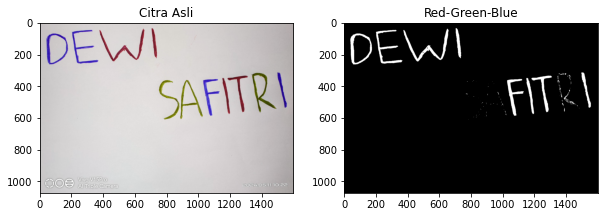

In [16]:
# Konversi citra ke ruang warna HSV
hsv = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# Tentukan batas atas dan batas bawah untuk warna biru dalam ruang warna HSV
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Tentukan batas atas dan batas bawah untuk warna merah dalam ruang warna HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Tentukan batas atas dan batas bawah untuk warna hijau dalam ruang warna HSV
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Buat mask untuk warna biru, merah, dan hijau
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Gabungkan mask biru, merah, dan hijau menggunakan operasi bitwise OR
mask_combined = cv2.bitwise_or(mask_blue, mask_red1)
mask_combined = cv2.bitwise_or(mask_combined, mask_red2)
mask_combined = cv2.bitwise_or(mask_combined, mask_green)

# Terapkan mask pada citra asli
hasil = cv2.bitwise_and(color_image, color_image, mask=mask_combined)

# Tampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_combined, cmap='gray')
axs[1].set_title('Red-Green-Blue')

plt.show()

# AMBANG BATAS NONE

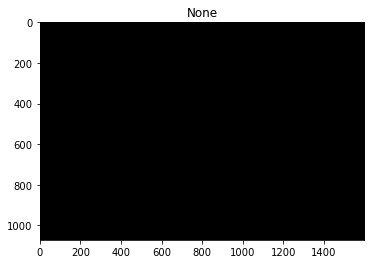

In [17]:
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('on')
    plt.show()

# Load gambar dalam format HSV
hsv_image = cv2.imread('UTSPRAKB.jpg', cv2.IMREAD_COLOR)
hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_BGR2HSV)

# Tentukan rentang warna biru dalam HSV
lower_blue = np.array([100, 50, 50])    # Ambang bawah warna biru (dalam HSV)
upper_blue = np.array([130, 255, 255])  # Ambang atas warna biru (dalam HSV)

# Tentukan rentang warna merah dalam HSV
lower_red1 = np.array([0, 50, 50])      # Ambang bawah warna merah (dalam HSV)
upper_red1 = np.array([10, 255, 255])   # Ambang atas warna merah (dalam HSV)

lower_red2 = np.array([170, 50, 50])    # Ambang bawah warna merah (dalam HSV) untuk nilai yang melintasi 180
upper_red2 = np.array([180, 255, 255])  # Ambang atas warna merah (dalam HSV) untuk nilai yang melintasi 180

# Tentukan rentang warna hijau dalam HSV
lower_green = np.array([50, 50, 50])     # Ambang bawah warna hijau (dalam HSV)
upper_green = np.array([80, 255, 255])   # Ambang atas warna hijau (dalam HSV)

# Buat mask untuk menangkap piksel biru, merah, dan hijau dalam rentang tersebut
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Gabungkan mask untuk biru, merah, dan hijau
red_blue_mask = cv2.bitwise_or(red_mask1, red_mask2)
combined_mask = cv2.bitwise_or(blue_mask, cv2.bitwise_or(red_blue_mask, green_mask))

# Buat citra hitam dengan ukuran yang sama dengan citra asli
black_image = np.zeros_like(hsv_image, dtype=np.uint8)

# Masking citra hitam dengan masker gabungan untuk mendapatkan warna hitam pada area biru, merah, dan hijau
black_detected_image = cv2.bitwise_and(black_image, black_image, mask=combined_mask)

display_image(black_detected_image, "None")